In [18]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils


In [19]:
def convolve_im_freq(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    
    ### START YOUR CODE HERE ###
    # Compute the FFT of the image
    fft_im = np.fft.fft2(im)
    
    # Multiply in the frequency domain (Convolution Theorem)
    fft_filtered = fft_im * fft_kernel
    
    # Compute the inverse FFT to get the filtered image in spatial domain
    conv_result = np.fft.ifft2(fft_filtered)
    
    # Take the real part (the imaginary part should be negligible)
    conv_result = np.real(conv_result)
    
    if verbose:
        # Use plt.subplot to place two or more images beside each other
        plt.figure(figsize=(20, 4))
        
        # Original Image
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")
        plt.axis('off')
        
        # Amplitude of the image in frequency domain
        plt.subplot(1, 5, 2) 
        fft_im_shifted = np.fft.fftshift(fft_im)
        amplitude_fft_im = np.abs(fft_im_shifted)
        amplitude_fft_im_log = np.log(1 + amplitude_fft_im)
        plt.imshow(amplitude_fft_im_log, cmap="gray")
        plt.title("FFT Image")
        plt.axis('off')
        
        # Amplitude of the filter in frequency domain
        plt.subplot(1, 5, 3)
        fft_kernel_shifted = np.fft.fftshift(fft_kernel)
        amplitude_fft_kernel = np.abs(fft_kernel_shifted)
        amplitude_fft_kernel_log = np.log(1 + amplitude_fft_kernel)
        plt.imshow(amplitude_fft_kernel_log, cmap="gray")
        plt.title("FFT Kernel")
        plt.axis('off')
        
        # Amplitude of the filtered image in the frequency domain
        plt.subplot(1, 5, 4)
        fft_filtered_shifted = np.fft.fftshift(fft_filtered)
        amplitude_fft_filtered = np.abs(fft_filtered_shifted)
        amplitude_fft_filtered_log = np.log(1 + amplitude_fft_filtered)
        plt.imshow(amplitude_fft_filtered_log, cmap="gray")
        plt.title("Filtered FFT Image")
        plt.axis('off')
        
        # Filtered image in the spatial domain
        plt.subplot(1, 5, 5) 
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
        plt.axis('off')
        
        plt.tight_layout()
    ### END YOUR CODE HERE ###
    return conv_result

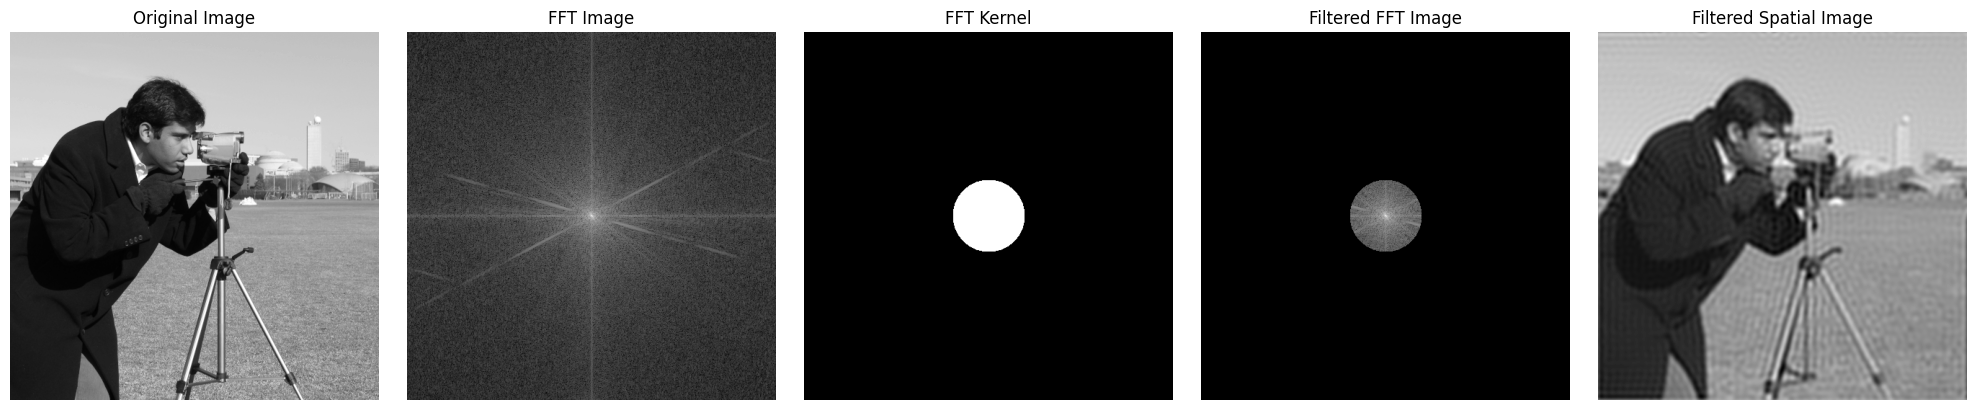

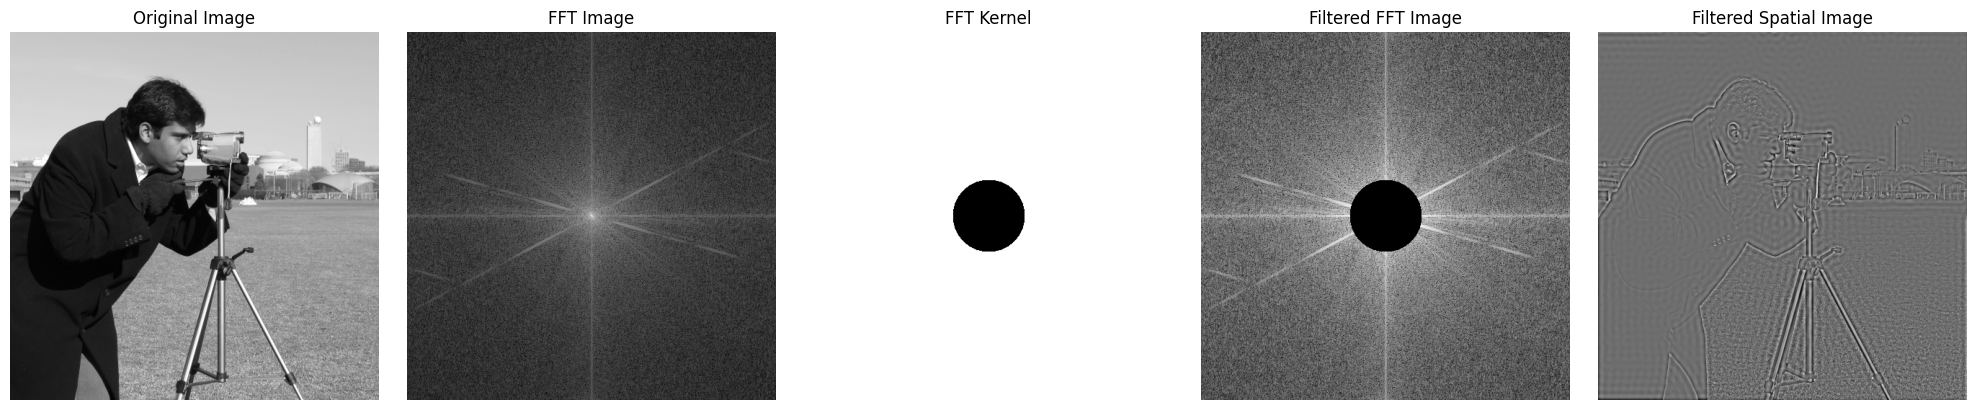

Saving image to: image_processed\camera_low_pass.png
Saving image to: image_processed\camera_high_pass.png


c:\Users\tobia\Documents\ImageProcessing\TDT4195-StarterCode-2024\Assignment 2\utils.py:27: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [20]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im_freq(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im_freq(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)